## Part 1: Visualizing patterns in the data

* *First create the week-day plots, the months, the 24-hour cycle, and the 168 hours of the week as barcharts (Week 2, Part 2).*

In [44]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])
data = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240204.csv") 

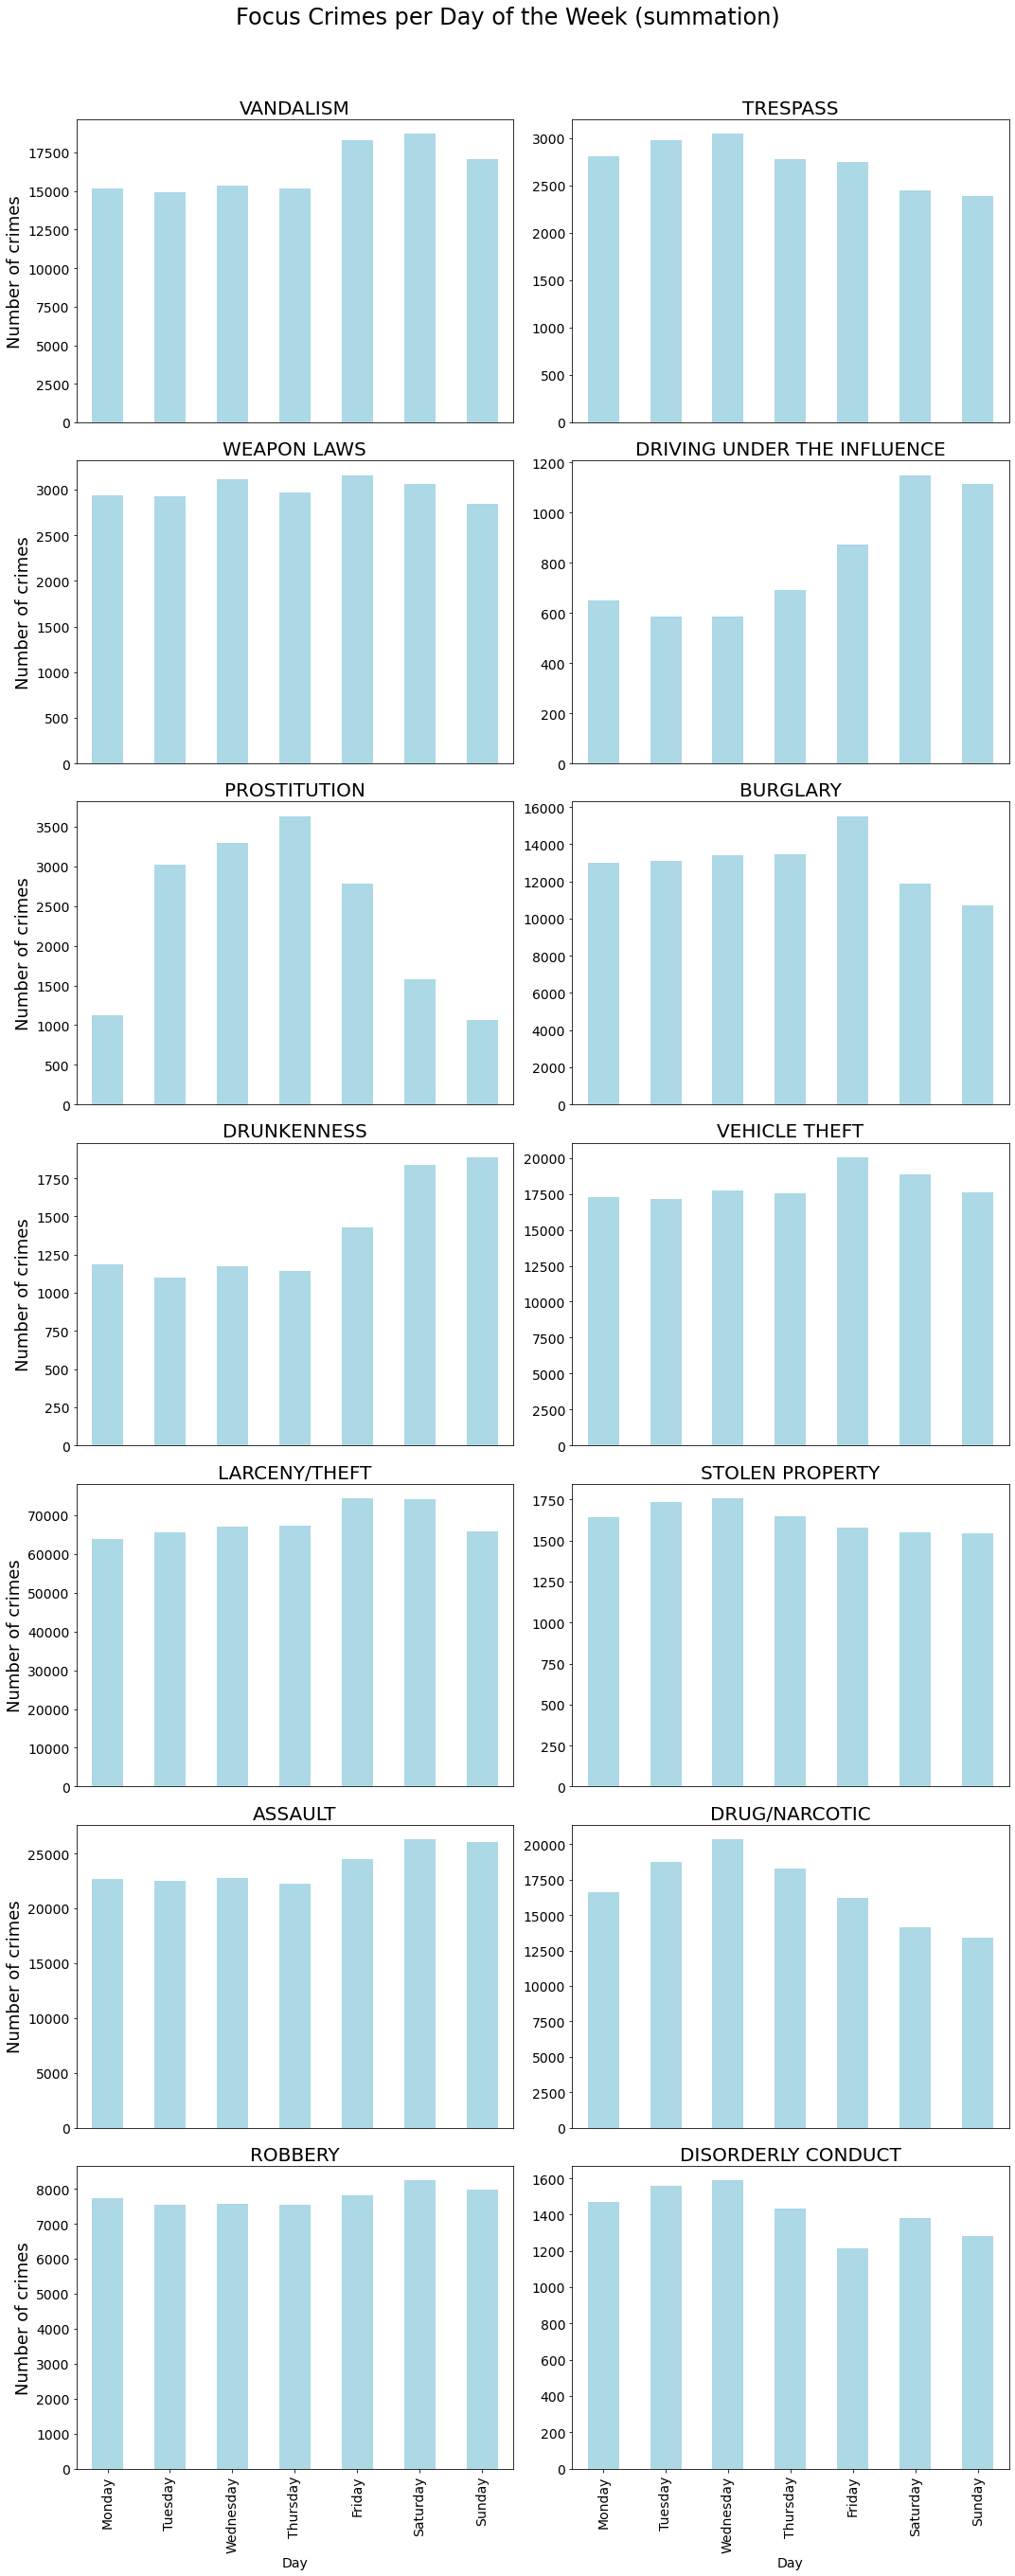

In [37]:
fig, axes = plt.subplots(nrows=(len(focuscrimes) + 1) // 2, ncols=min(2, len(focuscrimes)), figsize=(15, 5*(len(focuscrimes) + 1) // 2))
axes = axes.flatten()

#create new column frome date with the days
data['Day'] = pd.to_datetime(data['Date']).dt.day_name()
data['Day'] = pd.Categorical(data['Day'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)

for i,focus in enumerate(focuscrimes):
    data_focus = data[data['Category'] == focus]
    crimes_per_year = data_focus['Day'].value_counts().sort_index()
    crimes_per_year.plot(kind='bar', color='lightblue', ax=axes[i])
    
    if i % 2 == 0:  # Set y-axis label only on every other subplot
        axes[i].set_ylabel('Number of crimes', fontsize=18) 
    axes[i].tick_params(axis='y', labelsize=14)
    if i < len(axes) - min(2, len(focuscrimes)):  # Remove x axis labels
        axes[i].set_xticks([])
    axes[i].set_title(focus, fontsize=20)
    
    
axes[-1].set_xlabel('Day', fontsize=14)
axes[-2].set_xlabel('Day', fontsize=14)

# Add axes on the bottom subplots:
for ax in axes[-2:]:
    ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
    ax.tick_params(axis='x', labelsize=14)

fig.suptitle('Focus Crimes per Day of the Week (summation)', fontsize=24, y=1.02)

plt.tight_layout()
plt.show()

#### Weekday plot:
The plot above shows the number of focus crimes summed per day of the week, over the years in the dataset. Each subplot represents a focuscrime, and note that the y-axis differs alot in each plot, so that you are able to see how the crime rates changes over the week for each focus crime.

By the y-axis on the plots it is easy to detect which crimes are comitted the most. This is clearly Larcency theft.
Some of the crimes are committed mostly in the weekend, such as driving under the influence, drunkennes and vandalism. Whereas some are more in the weekdays (suprisingly), such as prostitution, drug/narcotic and trespass. These are interesting trends that can found from this plot.

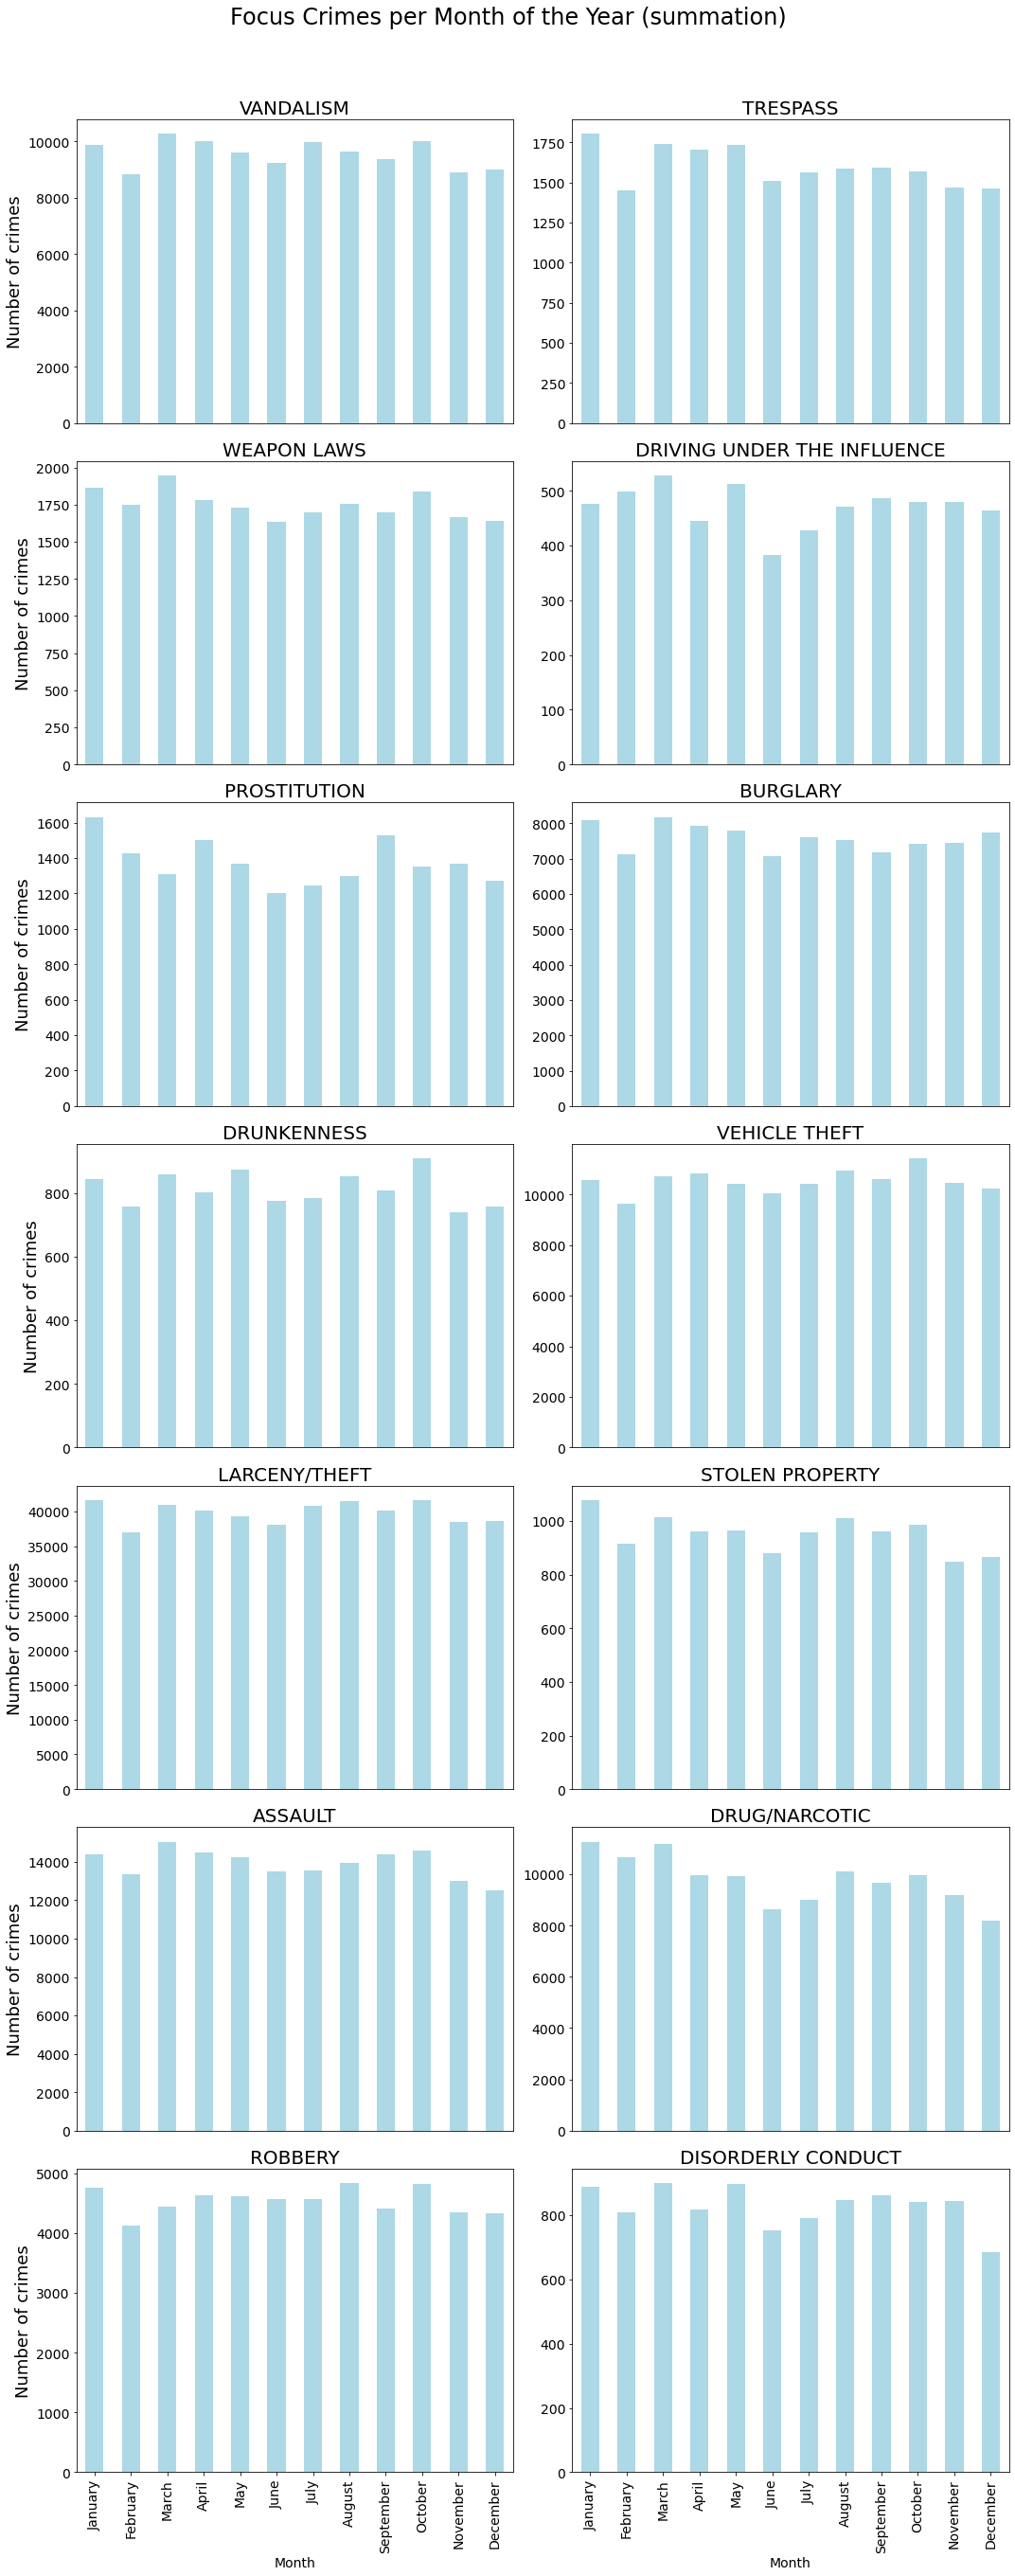

In [41]:
fig, axes = plt.subplots(nrows=(len(focuscrimes) + 1) // 2, ncols=min(2, len(focuscrimes)), figsize=(15, 5*(len(focuscrimes) + 1) // 2))
axes = axes.flatten()

#create new column frome date with the months
data['Month'] = pd.to_datetime(data['Date']).dt.month_name()
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
data['Month'] = pd.Categorical(data['Month'], categories=months_order, ordered=True)

for i,focus in enumerate(focuscrimes):
    data_focus = data[data['Category'] == focus]
    crimes_per_year = data_focus['Month'].value_counts().sort_index()
    crimes_per_year.plot(kind='bar', color='lightblue', ax=axes[i])

    if i % 2 == 0:  # Set y-axis label only on every other subplot
        axes[i].set_ylabel('Number of crimes', fontsize=18) 
    axes[i].tick_params(axis='y', labelsize=14)
    if i < len(axes) - min(2, len(focuscrimes)):  # Remove x axis labels
        axes[i].set_xticks([])
    axes[i].set_title(focus, fontsize=20)
    
    
axes[-1].set_xlabel('Month', fontsize=14)
axes[-2].set_xlabel('Month', fontsize=14)

# Add axes on the bottom subplots:
for ax in axes[-2:]:
    ax.set_xticklabels(months_order)
    ax.tick_params(axis='x', labelsize=14)

fig.suptitle('Focus Crimes per Month of the Year (summation)', fontsize=24, y=1.02)

plt.tight_layout()
plt.show()

#### Monthly plot
The plot above shows the number of focus crimes summed per month of the year, over the years in the dataset. Each subplot represents a focuscrime, and note again that the y-axis differs alot in each plot, so that you are able to see how the crime rates changes over the year for each focus crime.

Here you see a little less variation over the months than over the days of the week. For many of the crimes, there are no obvious patterns. But many of the focus crimes are less committed in december (and november) and more committed in january! I dont know what the reason might be.

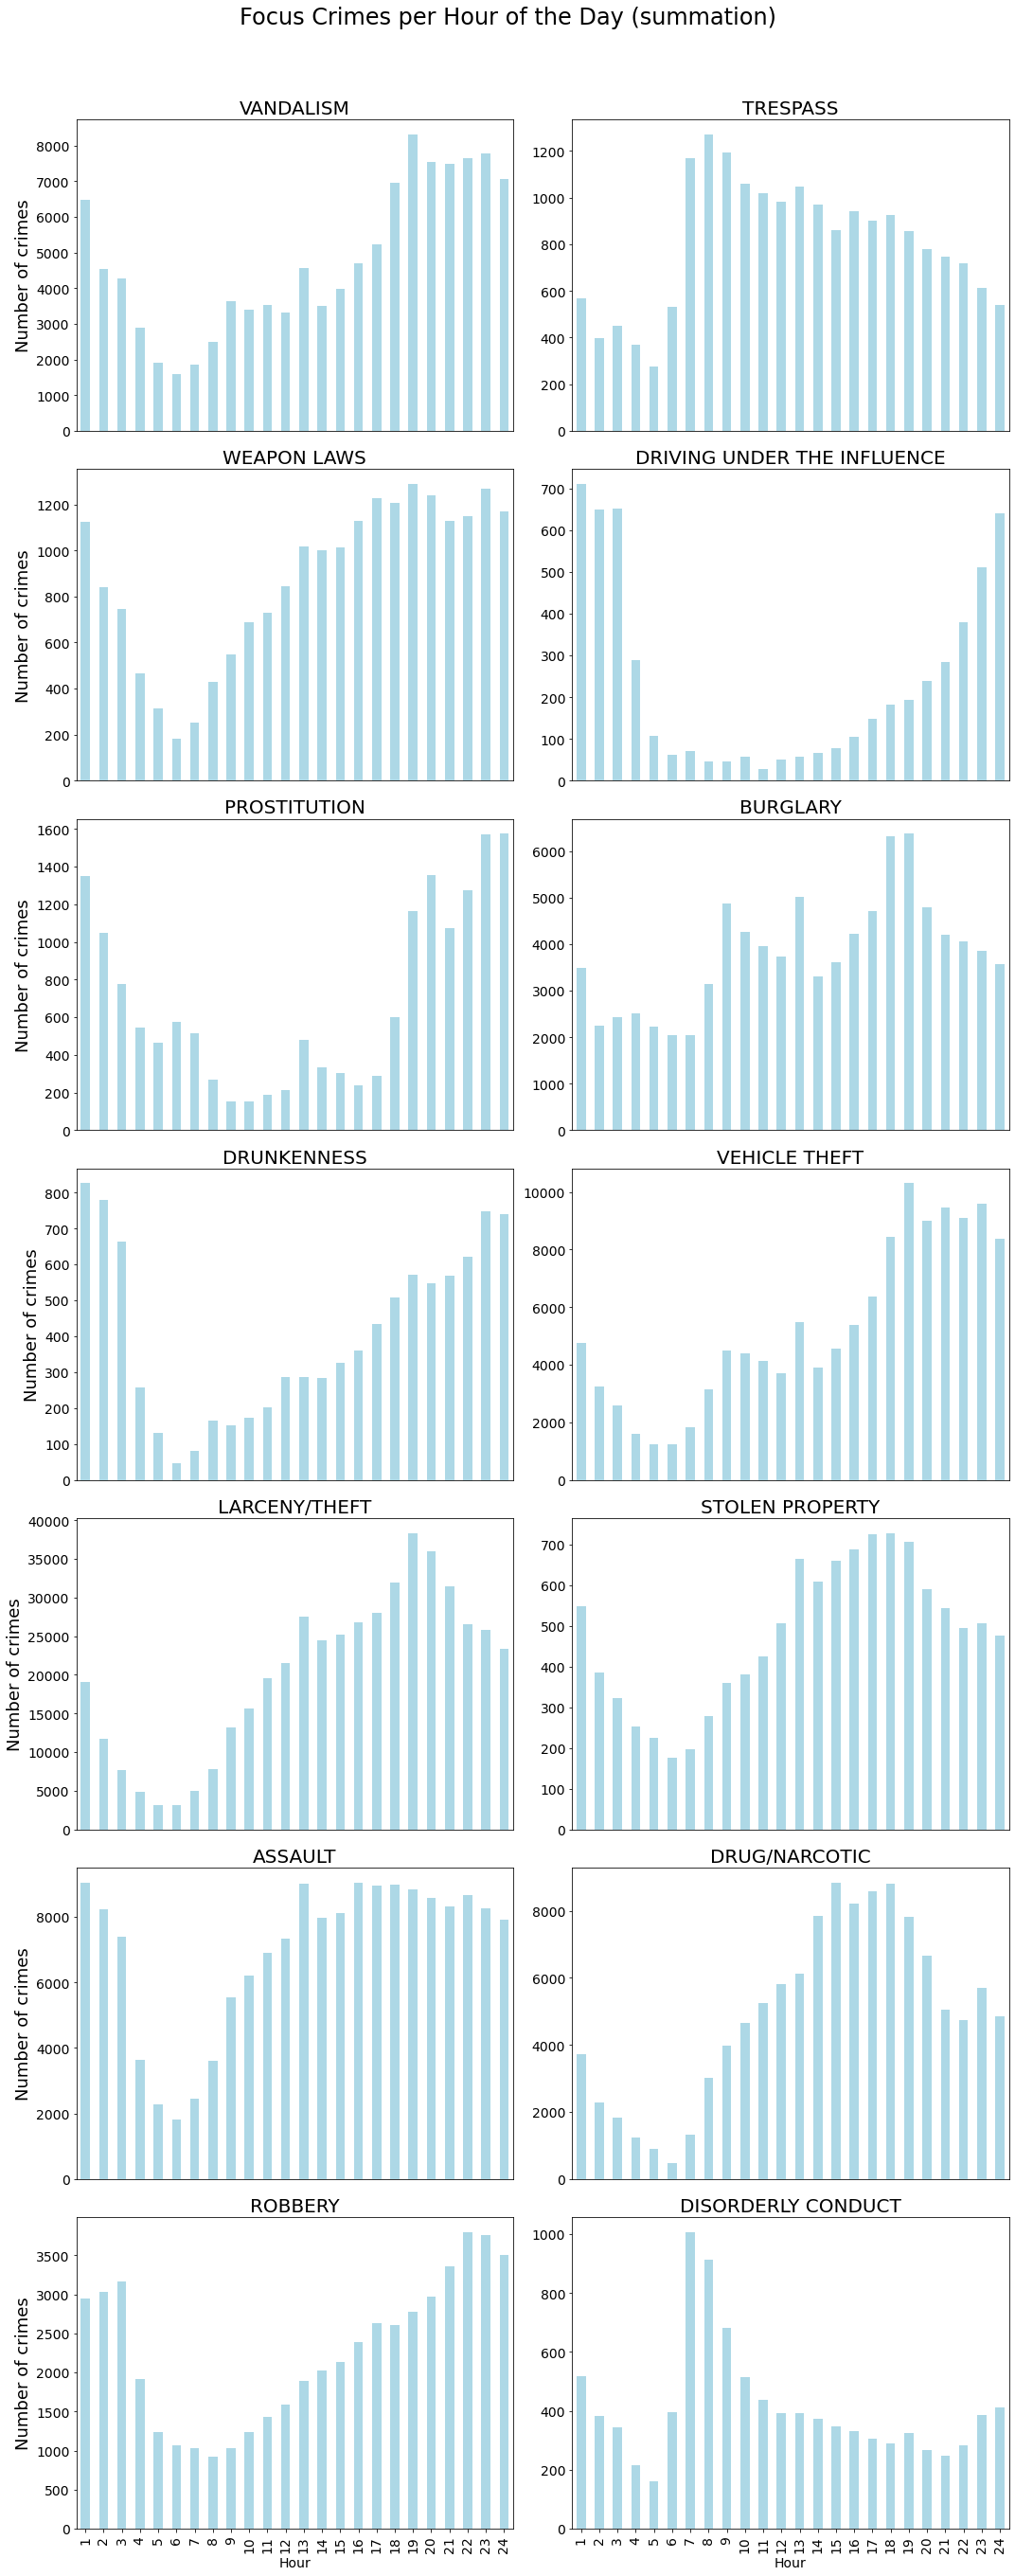

In [51]:
fig, axes = plt.subplots(nrows=(len(focuscrimes) + 1) // 2, ncols=min(2, len(focuscrimes)), figsize=(15, 5*(len(focuscrimes) + 1) // 2))
axes = axes.flatten()

#create new column frome date with the hours
data['Time'] = pd.to_datetime(data['Time'])
data['Hour'] = data['Time'].dt.hour


for i,focus in enumerate(focuscrimes):
    data_focus = data[data['Category'] == focus]
    crimes_per_year = data_focus['Hour'].value_counts().sort_index()
    crimes_per_year.plot(kind='bar', color='lightblue', ax=axes[i] ,xlim=(0.5, 24.5))

    if i % 2 == 0:  # Set y-axis label only on every other subplot
        axes[i].set_ylabel('Number of crimes', fontsize=18) 
    axes[i].tick_params(axis='y', labelsize=14)
    if i < len(axes) - min(2, len(focuscrimes)):  # Remove x axis labels
        axes[i].set_xticks([])
    axes[i].set_title(focus, fontsize=20)

axes[-1].set_xlabel('Hour', fontsize=14)
axes[-2].set_xlabel('Hour', fontsize=14)

# Add axes on the bottom subplots:
for ax in axes[-2:]:
    ax.set_xticklabels(list(np.arange(1, 25)))
    ax.tick_params(axis='x', labelsize=14)
    

fig.suptitle('Focus Crimes per Hour of the Day (summation)', fontsize=24, y=1.02)

plt.tight_layout()
plt.show()

#### Hour plot
The plot above shows the number of focus crimes summed per hour of the day, over the years in the dataset. Each subplot represents a focuscrime, and note once again that the y-axis differs alot in each plot, so that you are able to see how the crime rates changes over the day for each focus crime.

This plot gives alot of information about the patterns of the commitment of focus crimes! A lot of the crimes tend to be really low in the early morning and rise throughout the whole day. Some differs from this though. Trespassing happens mostly in the morning from 7 and falls throughout the day. Burglary happens any time of the day. And wierdly enough disorderly conduct happens alot between 7 and 9 in the morning..

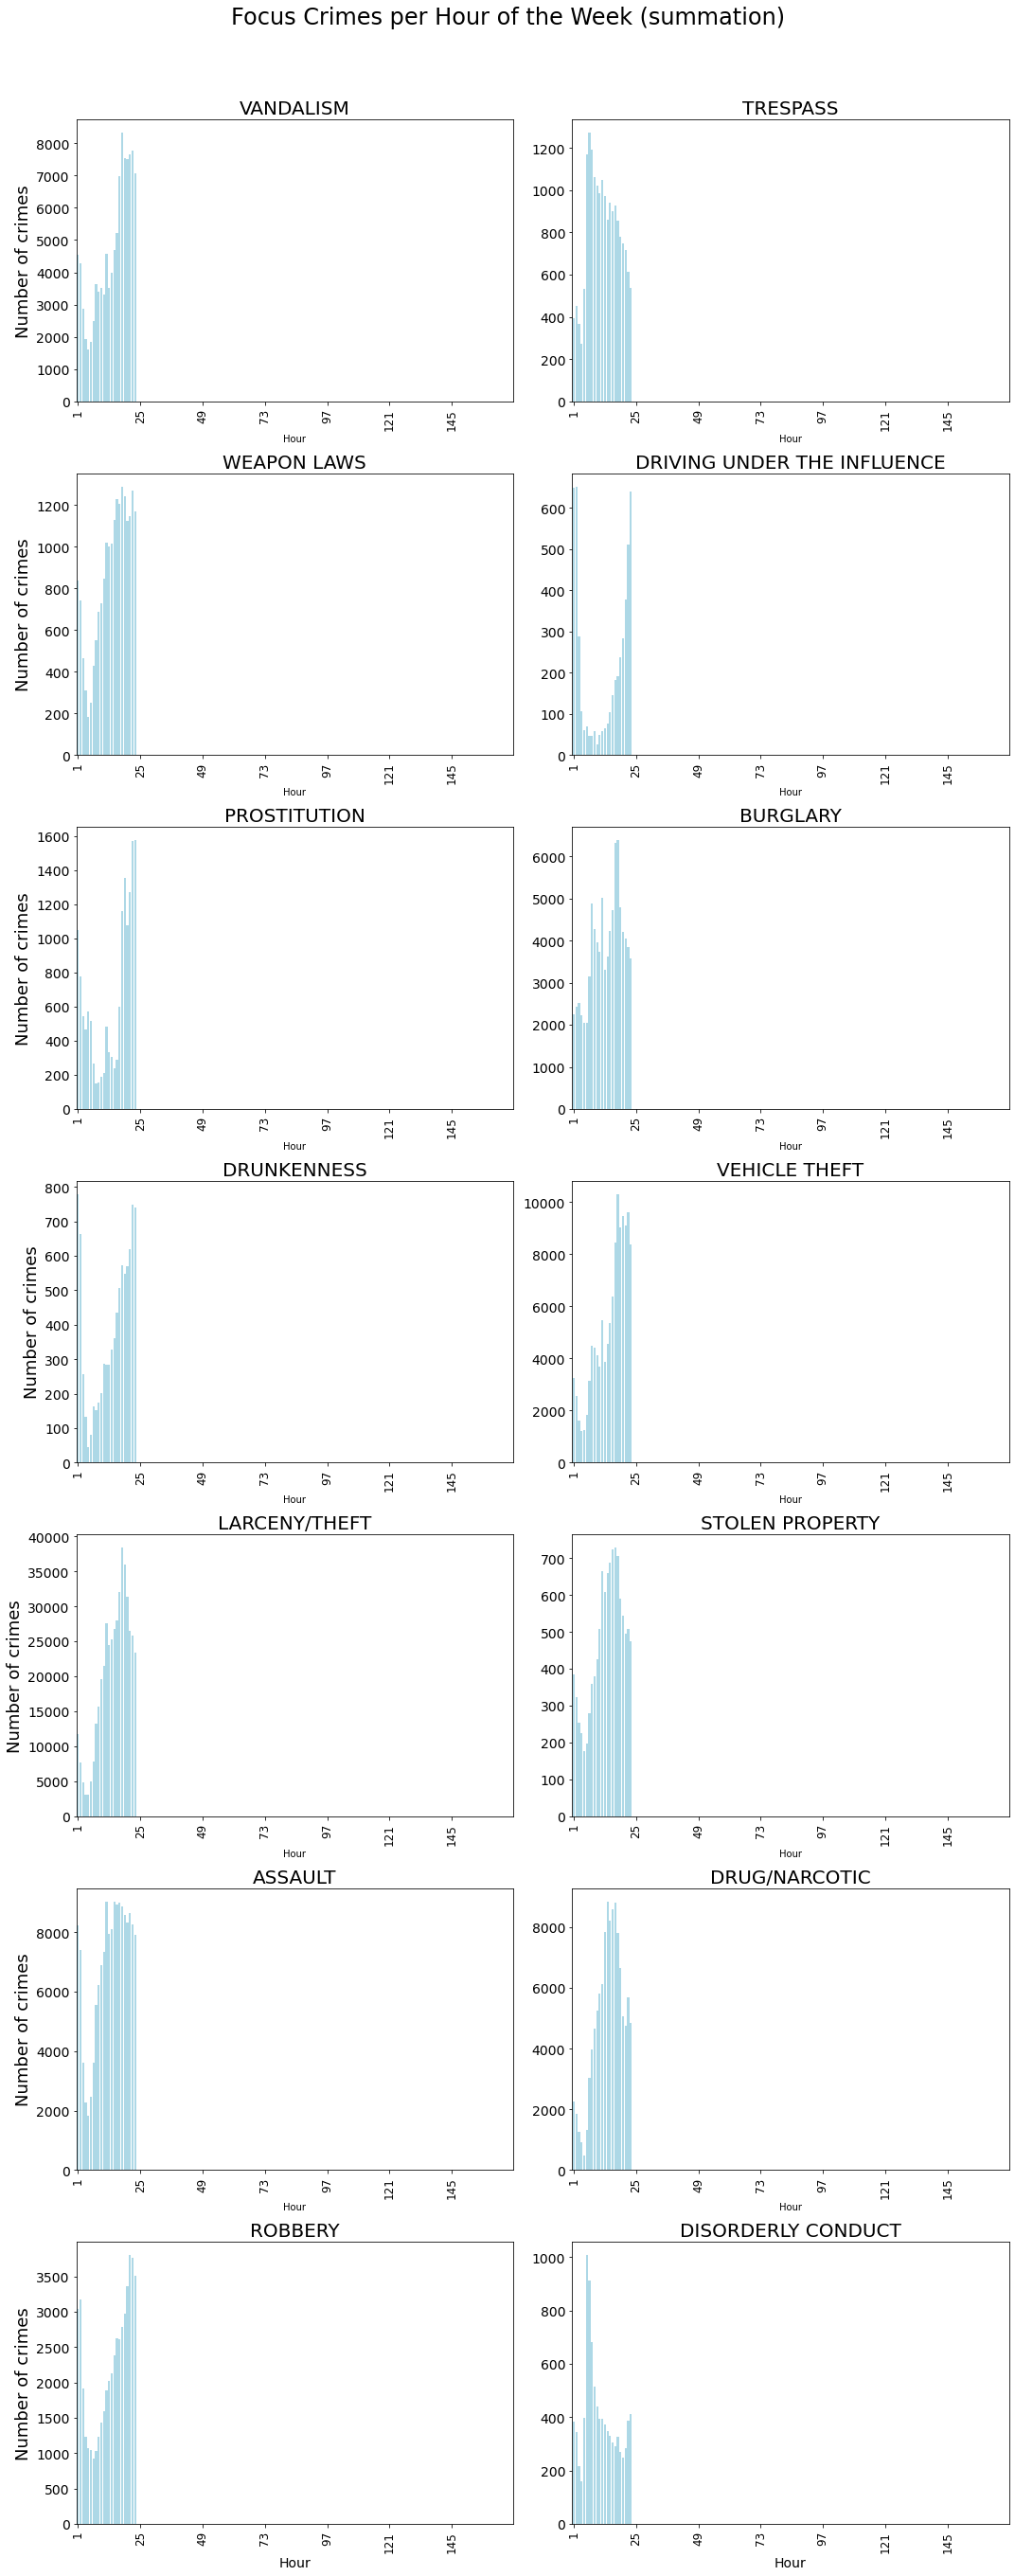

In [67]:
import numpy as np

# Calculate the week number for each date
data['Week'] = data['Time'].dt.isocalendar().week

# Group data by hour and week, then count occurrences
crimes_per_week_hour = data.groupby(['Week', 'Hour']).size().unstack(fill_value=0)

# Sum the occurrences of each hour over all weeks
total_crimes_per_hour = crimes_per_week_hour.sum()

# Ensure all hours are represented in the total_crimes_per_hour Series
total_crimes_per_hour = total_crimes_per_hour.reindex(range(1, 169), fill_value=0)

# Plotting
fig, axes = plt.subplots(nrows=(len(focuscrimes) + 1) // 2, ncols=min(2, len(focuscrimes)), figsize=(15, 5*(len(focuscrimes) + 1) // 2))
axes = axes.flatten()

for i, focus in enumerate(focuscrimes):
    data_focus = data[data['Category'] == focus]
    crimes_per_week_hour = data_focus.groupby(['Week', 'Hour']).size().unstack(fill_value=0)
    total_crimes_per_hour = crimes_per_week_hour.sum(axis=0)  # Sum crimes over all weeks for each hour
    
    # Ensure all hours are represented in the total_crimes_per_hour Series
    total_crimes_per_hour = total_crimes_per_hour.reindex(range(1, 169), fill_value=0)
    
    # Plot all 168 hours
    total_crimes_per_hour.plot(kind='bar', color='lightblue', ax=axes[i], width=0.8)
    
    if i % 2 == 0:
        axes[i].set_ylabel('Number of crimes', fontsize=18)
    axes[i].tick_params(axis='y', labelsize=14)
    axes[i].set_xticks(np.arange(0, 168, 24))  # Set x-axis ticks every 24 hours
    axes[i].set_xticklabels(np.arange(1, 169, 24), fontsize=12)  # Set x-axis labels for every 24 hours
    axes[i].set_title(focus, fontsize=20)

# Add x-axis label for the last two subplots
axes[-1].set_xlabel('Hour', fontsize=14)
axes[-2].set_xlabel('Hour', fontsize=14)

# Add a big caption to the entire plot
fig.suptitle('Focus Crimes per Hour of the Week (summation)', fontsize=24, y=1.02)

plt.tight_layout()
plt.show()
